In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from warnings import filterwarnings
filterwarnings(action='ignore')

In [157]:
df = pd.read_csv("C:\\Users\\dell\\Downloads\\Spam Email Detection - spam.csv")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [158]:
data = df.where((pd.notnull(df)), ' ')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  5572 non-null   object
 3   Unnamed: 3  5572 non-null   object
 4   Unnamed: 4  5572 non-null   object
dtypes: object(5)
memory usage: 217.8+ KB


In [159]:
#For cleaning the Data
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
df.sample(5)

,v1,v2
4241,spam,Show ur colours! Euro 2004 2-4-1 Offer! Get an...
3868,ham,No let me do the math. Your not good at it.
2686,ham,There r many model..sony ericson also der.. &l...
4649,ham,Finally it has happened..! Aftr decades..! BEE...
2613,ham,Thanks for sending this mental ability question..


In [160]:
#For renaming the Data
df.rename(columns= {'v1':'Target', 'v2':'Text'}, inplace=True)
df.sample(5)

,Target,Text
415,ham,Whatsup there. Dont u want to sleep
3552,ham,Din i tell u jus now 420
5355,ham,Living is very simple.. Loving is also simple....
1665,ham,Dunno cos i was v late n when i reach they ins...
4999,ham,Well its not like you actually called someone ...


In [161]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [162]:
df['Target'] = encoder.fit_transform(df['Target'])
df.sample(5)

,Target,Text
1067,0,Meeting u is my work. . . Tel me when shall i ...
2835,0,Nice.nice.how is it working?
157,0,"Hello, my love. What are you doing? Did you ge..."
1418,0,Lmao. Take a pic and send it to me.
4532,1,Gr8 new service - live sex video chat on your ...


In [163]:
#For  missing values
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [164]:
#For identifying duplicate values
df.duplicated().sum()

409

In [165]:
#For removing duplicate values
df = df.drop_duplicates(keep="first")
df.duplicated().sum()

0

In [166]:
df.shape

(5163, 2)

In [167]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [168]:
df['Target'].value_counts()

Target
0    4516
1     647
Name: count, dtype: int64

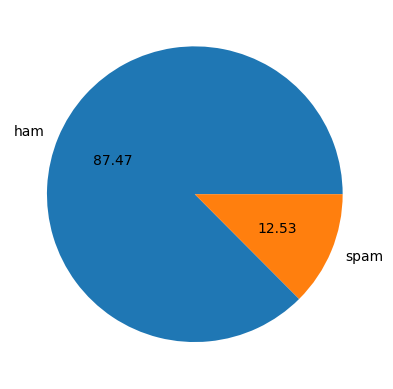

In [169]:
plt.pie(df['Target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()


In [170]:
pip install nltk

In [171]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [172]:
#Total number of characters
df['Character_Count'] = df['Text'].apply(len)
df.head()
     

,Target,Text,Character_Count
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [173]:
#Total number of words
df['Words_Count'] =  df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,Target,Text,Character_Count,Words_Count
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [174]:
#Total number of sentences
df['Sentences_Count'] =  df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,Target,Text,Character_Count,Words_Count,Sentences_Count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [175]:
df[['Character_Count', 'Words_Count', 'Sentences_Count']].describe()

,Character_Count,Words_Count,Sentences_Count
count,5163.000000,5163.000000,5163.000000
mean,78.811156,18.444122,1.963974
std,58.153491,13.327940,1.448008
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,116.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


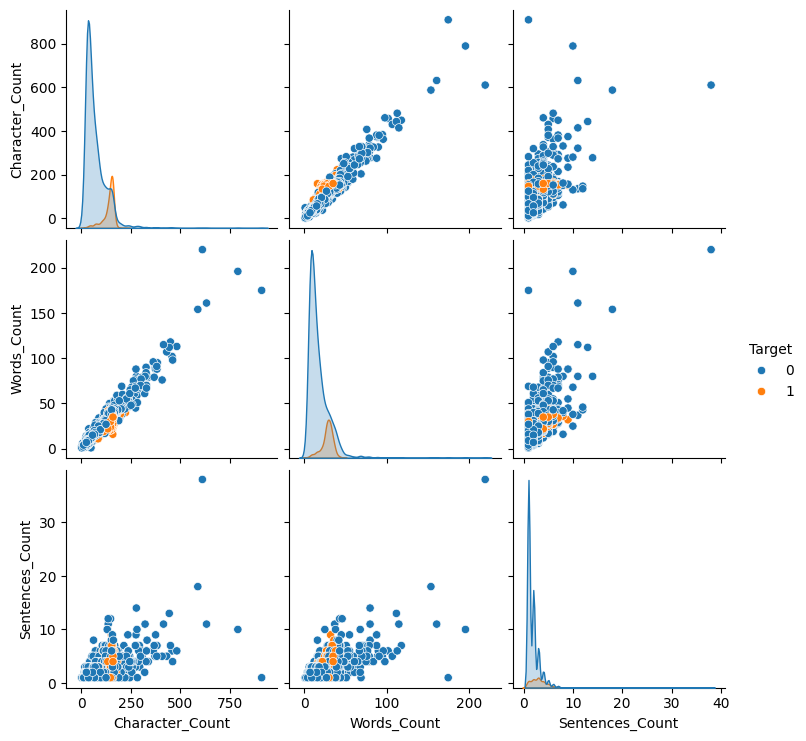

In [176]:
sns.pairplot(df, hue='Target')

In [177]:
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def trans_text(Text):
    Text = Text.lower()
    Text = nltk.word_tokenize(Text)

    y = []
    for i in Text:
        if i.isalnum():
            y.append(i)

    Text = y[:]
    y.clear()

    for i in Text:
        if i not in string.punctuation:
            y.append(i)

    Text = y[:]
    y.clear()

    for i in Text:
          y.append(ps.stem(i))

    return " ".join(y)
     

In [178]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [179]:
df['Transformed_Text'] = df['Text'].apply(trans_text)
df.head()

,Target,Text,Character_Count,Words_Count,Sentences_Count,Transformed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go until jurong point crazi avail onli in bugi...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri in 2 a wkli comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say so earli hor u c alreadi then say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i do think he goe to usf he live around he...


In [180]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [181]:
X = tfidf.fit_transform(df["Transformed_Text"]).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [182]:
X.shape

(5163, 3000)

In [183]:
Y = df["Target"].values
Y

array([0, 0, 1, ..., 0, 0, 0])

In [184]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=2, test_size=0.2)

In [185]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [186]:
gnb.fit(X_train, Y_train)
Y_pred1 = gnb.predict(X_test)
print('accuracy_score is:',accuracy_score(Y_test, Y_pred1)*100)
print('confusion_matrix is:\n',confusion_matrix(Y_test, Y_pred1))

accuracy_score is: 86.64085188770572
confusion_matrix is:
 [[790 122]
 [ 16 105]]


In [187]:
gnb.fit(X_train, Y_train)
Y_pred1 = gnb.predict(X_test)
print('accuracy_score is:',accuracy_score(Y_test, Y_pred1)*100)
print('confusion_matrix is:\n',confusion_matrix(Y_test, Y_pred1))

accuracy_score is: 86.64085188770572
confusion_matrix is:
 [[790 122]
 [ 16 105]]


In [188]:
mnb.fit(X_train, Y_train)
Y_pred2 = mnb.predict(X_test)
print('accuracy_score is:',accuracy_score(Y_test, Y_pred2)*100)
print('confusion_matrix is:\n',confusion_matrix(Y_test, Y_pred2))

accuracy_score is: 96.61181026137464
confusion_matrix is:
 [[911   1]
 [ 34  87]]


In [189]:
bnb.fit(X_train, Y_train)
Y_pred3 = bnb.predict(X_test)
print('accuracy_score is:',accuracy_score(Y_test, Y_pred3)*100)
print('confusion_matrix is:\n',confusion_matrix(Y_test, Y_pred3))

accuracy_score is: 98.3543078412391
confusion_matrix is:
 [[910   2]
 [ 15 106]]


In [190]:
results = pd.DataFrame({
    'Model Tests Scores': ['Confusion_Matrix 1','Confusion_Matrix 2','Confusion_Matrix 3'],
    'Score': [86.99,95.87,97.57]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)
     

,Model Tests Scores
Score,
97.57,Confusion_Matrix 3
95.87,Confusion_Matrix 2
86.99,Confusion_Matrix 1
